# Raport z zadania algorytm genetyczny
## Import bibliotek

In [1]:
from genetic import Genetic
from physics import target_function
from experiment import experiment, create_table, satisfy_budget
from tabulate import tabulate
from plotter import plot_results, plot_example

### Algorytm
Zaimplementowany algorytm wykorzystuje selekcje ruletkową z krzyżowaniem jednopunktowym oraz sukcesją generacyjną.
### Przykład działania
- $\mu$ = 60
- t_max = 400
- pc = 0.85
- pm = 0.05

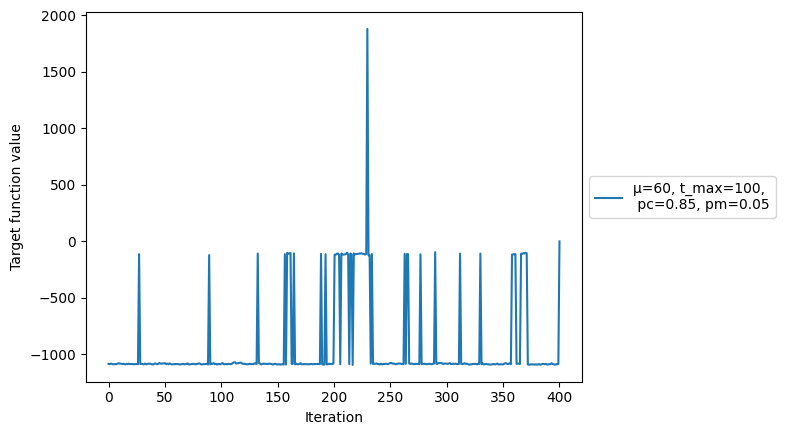

In [3]:
example = Genetic()
POP_N = 60
T_MAX = 400
PC = 0.85
PM = 0.05
ex_best = example.solve(target_function, pop_n=POP_N, t_max=T_MAX, pc=PC, pm=PM)
values = example.get_best_grades()
plot_example(values, T_MAX, "\u03BC=60, t_max=100,\n pc=0.85, pm=0.05")

## Cel eksperymentów
Zamierzam sprawdzić działanie algorytmu dla różnych hiperparametrów. Eksperymenty polegają na przeprowadzeniu 25 przebiegów algorytmu genetycznego dla każdej kombinacji hiperaparametrów, z których następnie wyciągany jest średni wynik wraz z odchyleniem standardowym. Badania pozwolą na porównanie wyników różnych populacji, ponieważ budżet wywołań funkcji celu jest stały (iloczyn liczby osobników i liczby iteracji jest stały). Przeprowadze badanie:
- 4 różnych kombinacji osobników z liczbą iteracji
- 4 różnych prawdopodobieństw krzyżowania
- 4 różnych prawdopodobieństw mutacji

In [4]:
INDIVIDUALS_NUMBER = [4, 8, 20, 40]
ITERATION_NUMBER = [100, 200, 500, 1000]
CROSSOVER_RATE = [0.6, 0.75, 0.85, 0.95]
MUTATION_RATE = [0.01, 0.05, 0.1, 0.2]
BUDGET = 4000
results = experiment(INDIVIDUALS_NUMBER, ITERATION_NUMBER, CROSSOVER_RATE, MUTATION_RATE, BUDGET)
ind_and_iter = satisfy_budget(INDIVIDUALS_NUMBER, ITERATION_NUMBER, BUDGET)
table = create_table(ind_and_iter,  CROSSOVER_RATE, MUTATION_RATE, results[0], results[1])
print(tabulate(table, headers="keys", tablefmt="fancy_grid"))

[-1072.20768, -1080.79116, -1079.91464, -1082.12436, -1087.41896, -1081.45824, -1083.63528, -1082.393, -1072.21372, -1082.93628, -1081.51108, -1083.5408, -1075.49496, -1082.82956, -1081.86396, -1082.40664, -1049.84096, -1064.47272, -1067.87992, -1067.68512, -980.12752, -1064.20208, -1065.21312, -1064.5468, -988.07352, -1064.06176, -1067.20616, -1066.75696, -1011.59728, -1059.9708, -1065.88424, -1066.63648, -984.892, -1007.0162, -1022.8156, -1036.075, -953.7054, -1015.4124, -1027.7758, -1031.322, -942.3418, -1031.0736, -1025.2838, -1036.0796, -906.7062, -1016.0422, -1025.4004, -1025.1148, -867.8588, -955.8952, -965.9012, -977.8588, -871.7088, -922.7996, -974.0992, -969.4072, -878.7052, -977.7968, -968.5664, -974.9008, -767.14, -945.582, -968.4952, -969.89] [175.98, 127.76, 127.51, 107.59, 117.6, 124.08, 107.58, 110.93, 182.99, 122.15, 123.36, 101.47, 161.8, 115.62, 119.34, 112.23, 228.42, 171.29, 158.92, 157.09, 346.96, 179.47, 170.35, 170.47, 338.48, 178.37, 167.97, 173.15, 321.93, 191

[1, 7] 4.0


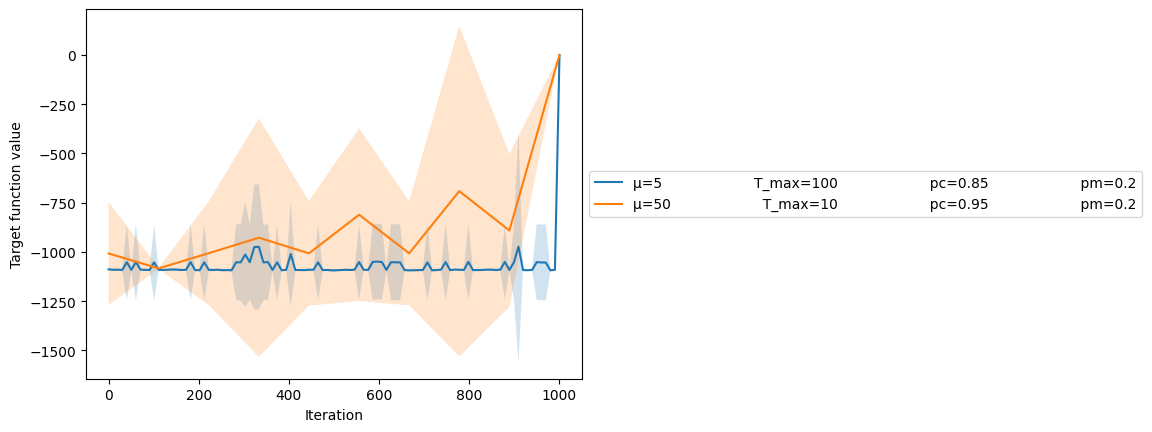

In [3]:
plot_results(table, results[0], results[2], results[3])

# Wyniki i wnioski
